## Zillow Explore

Since this competition revolves around the error of the Zestimate Algorithm, it is crucial that a categorical variable is created that can distinguish under and overpredicting sale price. Could go even further to create an ordinal scale around 0 to distinguish extremes.

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import os

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [33]:
path = r"D:/My Computer/DATA/Zillow"
train_df = pd.read_csv(open(os.path.join(path, "train_2016_v2.csv"), "r"),parse_dates=["transactiondate"])
print(train_df.shape)
prop_df = pd.read_csv(open(os.path.join(path, "properties_2016.csv"), "r"))
print(prop_df.shape)
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
del prop_df

(90275, 3)


D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


### Replicated 

https://www.kaggle.com/philippsp/exploratory-analysis-zillow

In Python

### Explore Variable Impact With Trees

In [34]:
train_y = train_df['logerror'].values.copy()
train_df['transaction_month'] = train_df['transactiondate'].dt.month

In [35]:
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
feat_names = train_df.columns.values

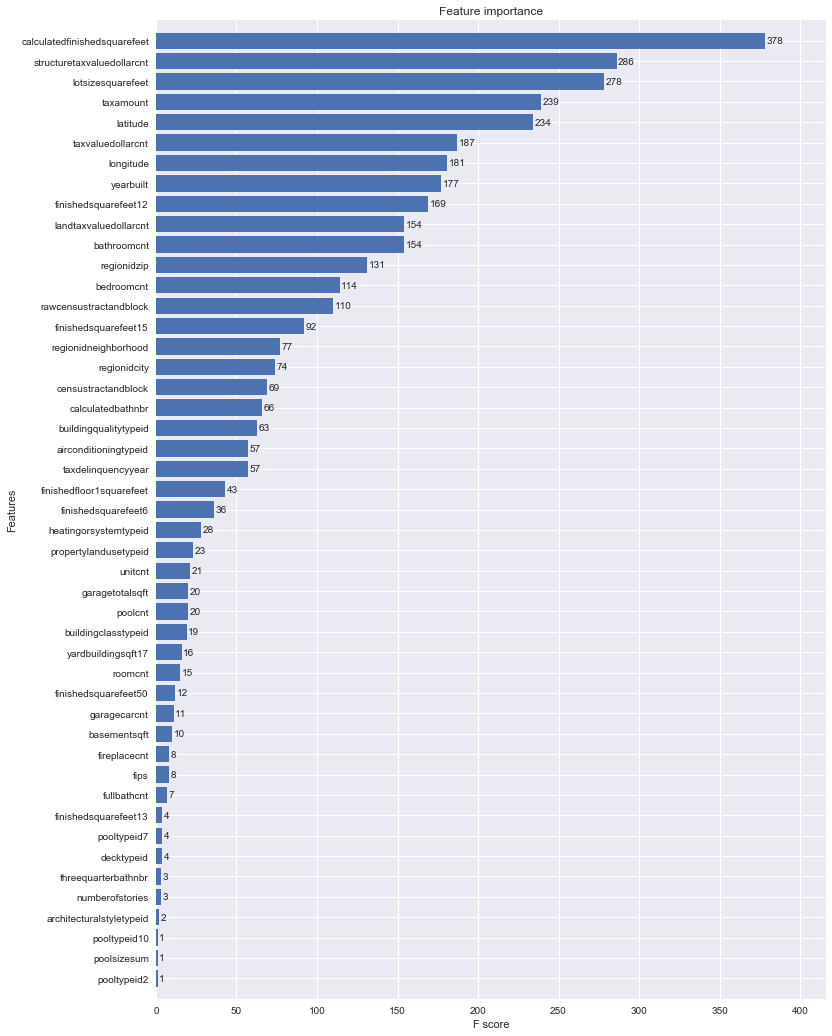

In [37]:
# Sudalaira
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [36]:
## Model Requires Clean Data

In [ ]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()